![Demosaicking](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/0129bbd70539e5c601b76b03e4d3883f67c39e72/Sesiones/Sesion2/Images/poster_sesion2.png)

# 🎨 **Hands-on Sesión 2.3: Transformaciones de Imágenes Digitales** 🖼️

En esta sesión aprenderemos a realizar **transformaciones clave** en imágenes digitales 📷. Exploraremos:

✅ Histogramas y ajustes de intensidad 📊  
✅ Transformaciones geométricas (traslación, rotación, escalado) 🔄  
✅ Ecualización de histograma y mejoras de contraste 🎭  
✅ Métodos avanzados como CLAHE y Stretching ⚡  
✅ Preguntas y desafíos para reforzar lo aprendido 🤔  

## 📂 **1. Creando Histogramas** <a name="tema1"></a> 📊

In [62]:
import numpy as np
import scipy.signal
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

### 📥 **Carga de Imagen de Prueba**

Vamos a descargar una imagen clásica: **Lena** 📷

In [63]:
%%capture
image_url = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/Lena512x512.png"
file_path = "Lena512x512.png"
!wget -O {file_path} {image_url}

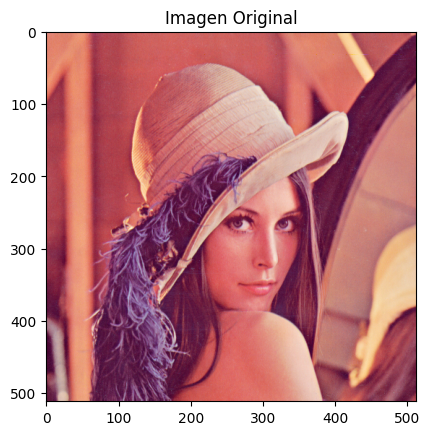

In [71]:
image = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_RGB)

# Mostrar la imagen
plt.imshow(image)
plt.title("Imagen Original")
plt.show()


### 📊 **Generando el Histograma General**

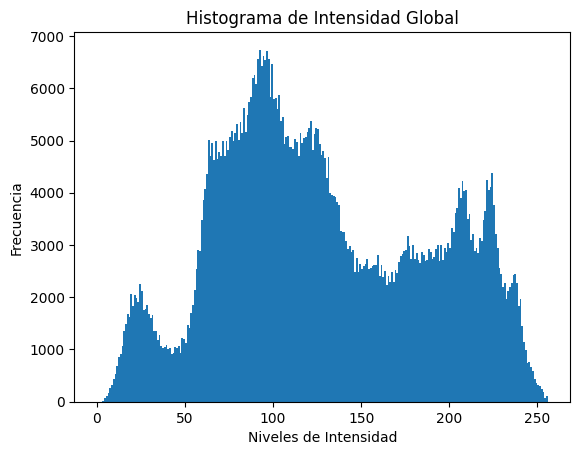

In [49]:
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Intensidad Global")
plt.show()

### 🏆 **Desafío:** Genera los histogramas para cada canal RGB y compáralos

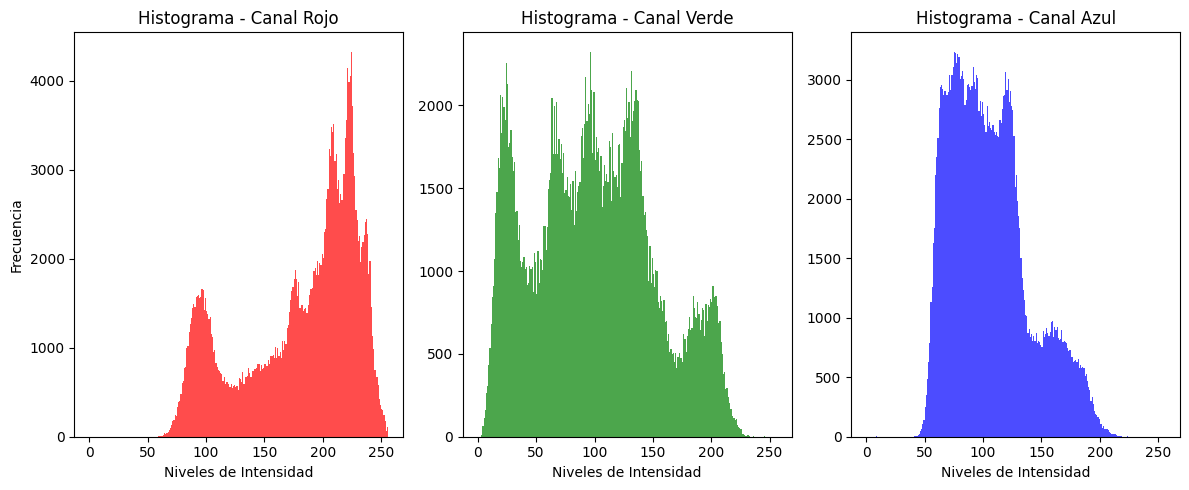

In [14]:

r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]  # Extraer los canales

# Configuración del gráfico
plt.figure(figsize=(12, 5))

# Histograma del canal rojo
plt.subplot(1, 3, 1)
plt.hist(r.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.title("Histograma - Canal Rojo")

# Histograma del canal verde
plt.subplot(1, 3, 2)
plt.hist(g.ravel(), bins=256, range=[0, 256], color='green', alpha=0.7)
plt.xlabel("Niveles de Intensidad")
plt.title("Histograma - Canal Verde")

# Histograma del canal azul
plt.subplot(1, 3, 3)
plt.hist(b.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.xlabel("Niveles de Intensidad")
plt.title("Histograma - Canal Azul")

# Ajustamos el diseño y mostramos la imagen
plt.tight_layout()
plt.show()


## 🔄 **2. Transformaciones Geométricas Afines** <a name="tema2"></a>

📌 En esta sección exploraremos **traslación**, **rotación** y **escalado**.

### ✈️ **Traslación (Translation)**

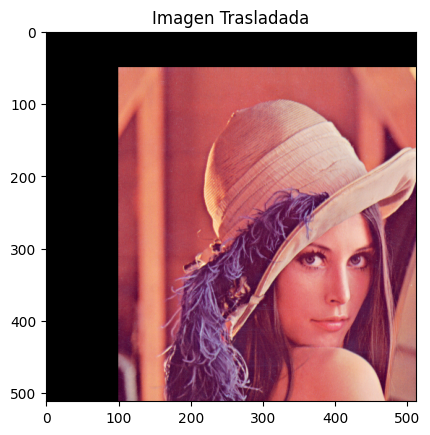

In [15]:
h, w = image.shape[:2]
transition_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
img_translation = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(img_translation)
plt.title("Imagen Trasladada")
plt.show()

### 🔄 **Rotación y Escalado**

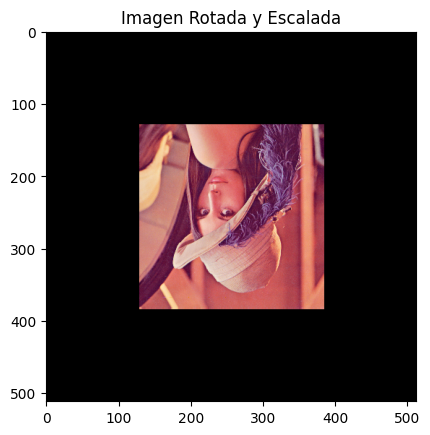

In [16]:
rotation_matrix = cv.getRotationMatrix2D(center=(w/2, h/2), angle=-180, scale=0.5)
rotated_image = cv.warpAffine(src=image, M=rotation_matrix, dsize=(w, h))

plt.imshow(rotated_image)
plt.title("Imagen Rotada y Escalada")
plt.show()

###

(<matplotlib.image.AxesImage at 0x7b68541d3950>,
 Text(0.5, 1.0, 'Escalado arbitrario'))

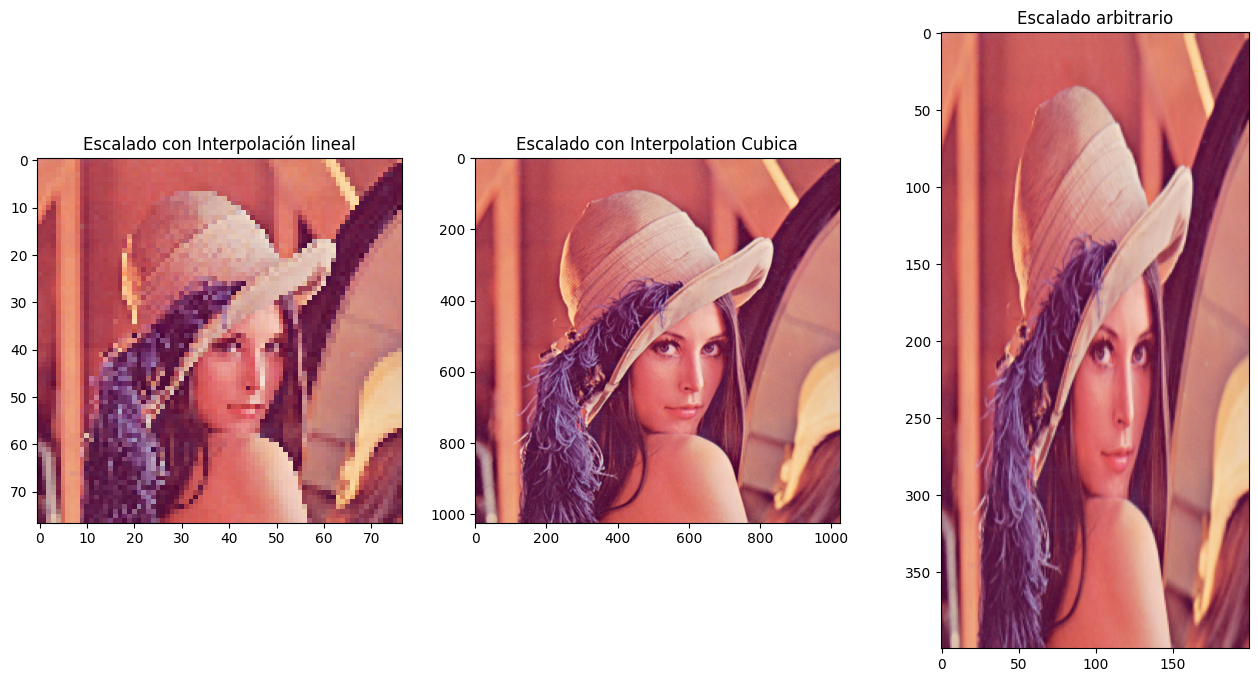

In [50]:
# Escalando
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15) # 0.15 veces su tamaño original
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC) # 2 veces su tamaño original
image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA) # definiendo el tamaño arbitrariamente

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(image_scaled), ax[0].set_title("Escalado con Interpolación lineal")
ax[1].imshow(image_scaled_2), ax[1].set_title("Escalado con Interpolation Cubica")
ax[2].imshow(image_scaled_3), ax[2].set_title("Escalado arbitrario")

## 🌈 **3. Transformaciones de Intensidad a Nivel de Píxel** <a name="tema3"></a>

### 🔄 **Negativo de la Imagen**

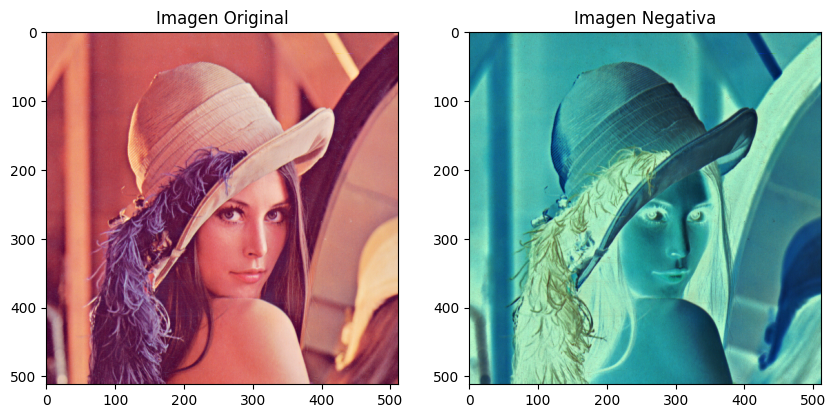

In [51]:
image_neg = 255 - image

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(image_neg)
plt.title("Imagen Negativa")
plt.show()

### ☀️ **Umbralización (Thresholding)**

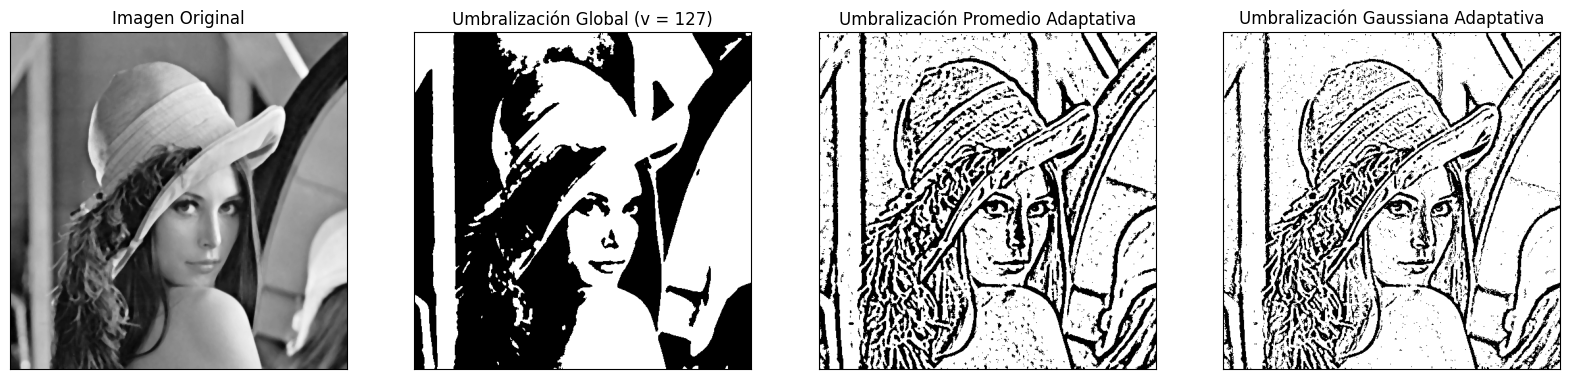

In [19]:
# Convertir la imagen a escala de grises
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# Aplicar umbralización con OpenCV
img = gray_img
img = cv.medianBlur(img, 5)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Imagen Original', 'Umbralización Global (v = 127)', 'Umbralización Promedio Adaptativa', 'Umbralización Gaussiana Adaptativa']
images = [img, th1, th2, th3]

plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Para esconder los "ticks"
plt.show()

## 🎭 **4. Ecualización del Histograma** <a name="tema4"></a>

**Objetivo:** Mejorar el contraste ajustando la distribución de intensidad de la imagen.

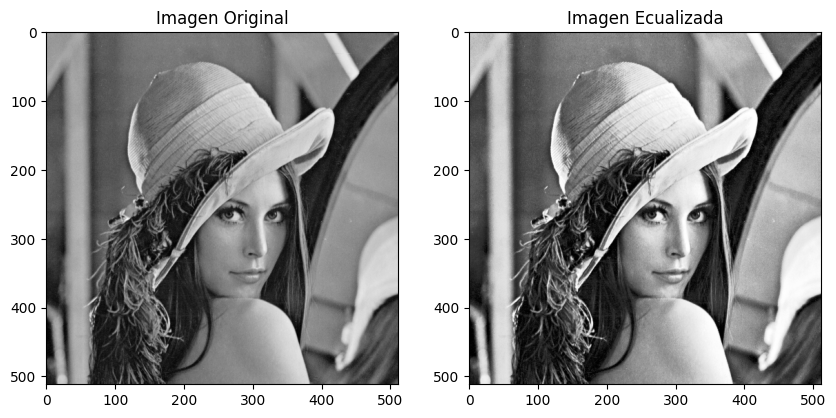

In [20]:
equ = cv.equalizeHist(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.show()

## ⚡ **5. CLAHE - Ecualización de Histograma Adaptativa** <a name="tema5"></a>

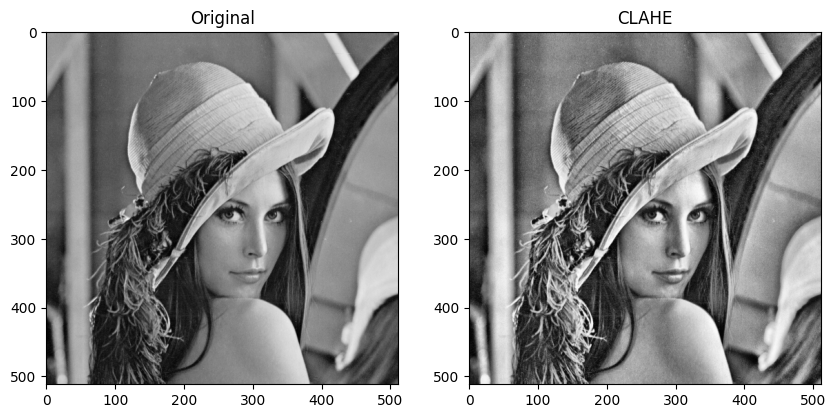

In [21]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE")
plt.show()

## 🔍 **6. Ampliación del Histograma (Contrast Stretching)** <a name="tema6"></a>

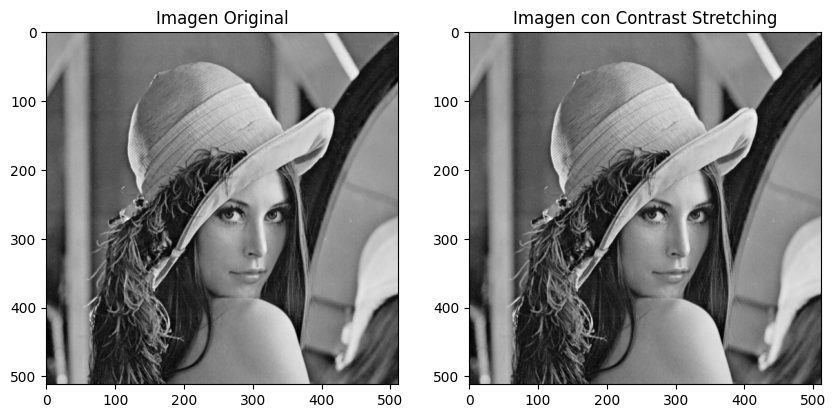

In [22]:
Imin = np.amin(gray_img)
Imax = np.amax(gray_img)
stretched_img = ((gray_img - Imin) * (255 / (Imax - Imin))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title("Imagen con Contrast Stretching")
plt.show()

## 🔬 **7. Aplicaciones y Experimentación** <a name="tema7"></a>

### 🏆 **Desafío:** Prueba diferentes transformaciones

📌 **Instrucciones:**
- Aplica **otras transformaciones geométricas** combinando traslación, rotación y escalado.
- Experimenta con **diferentes valores de umbralización** para mejorar la segmentación.
- Prueba distintos **valores de gamma** en la corrección gamma.
- Realiza **combinaciones de ecualización de histograma** con otras técnicas de mejora.

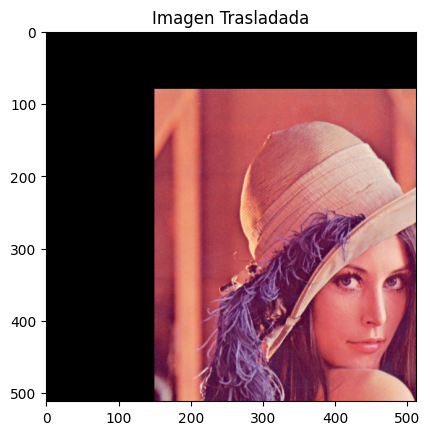

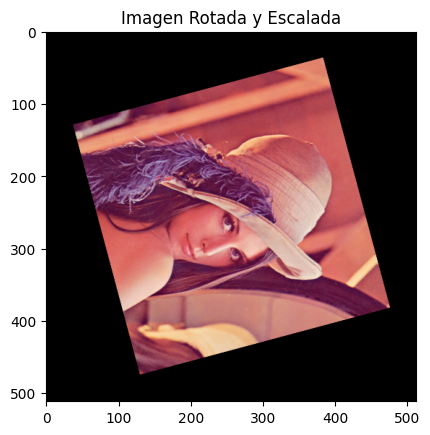

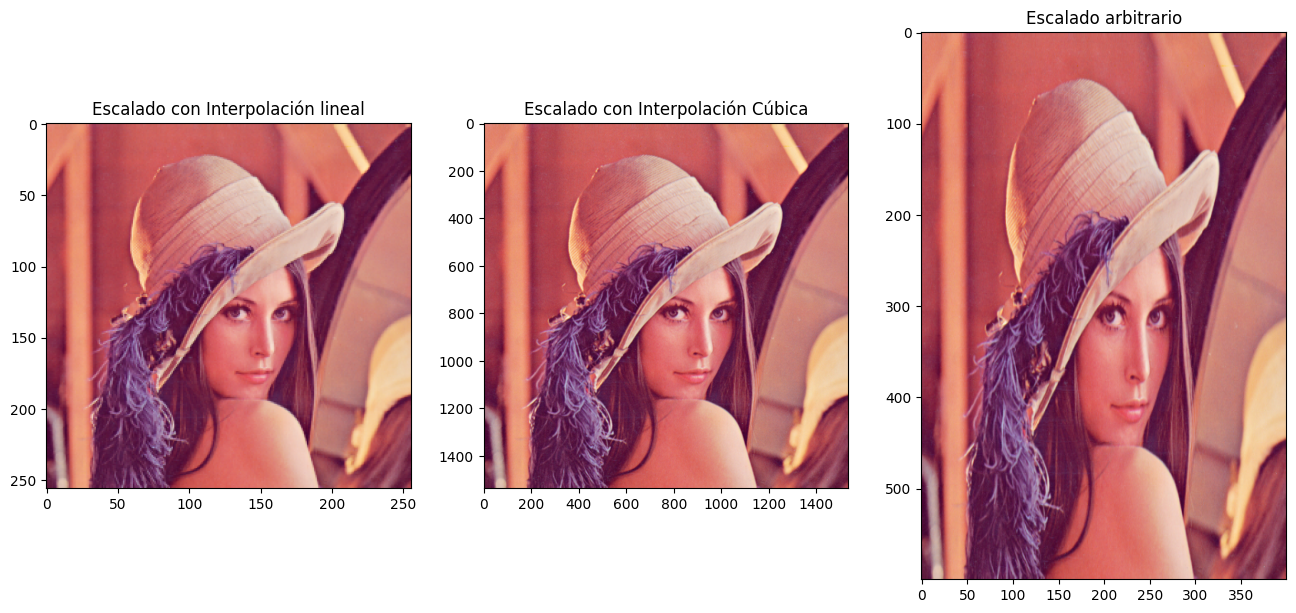

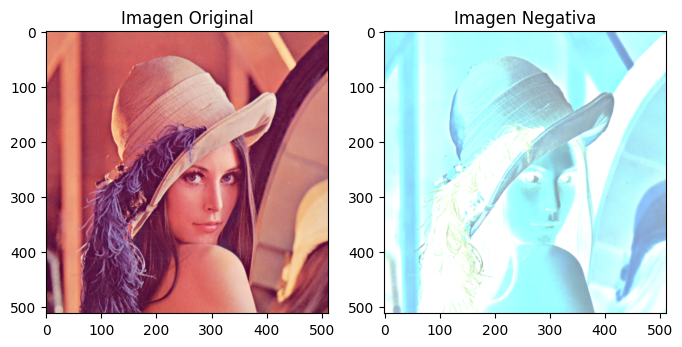

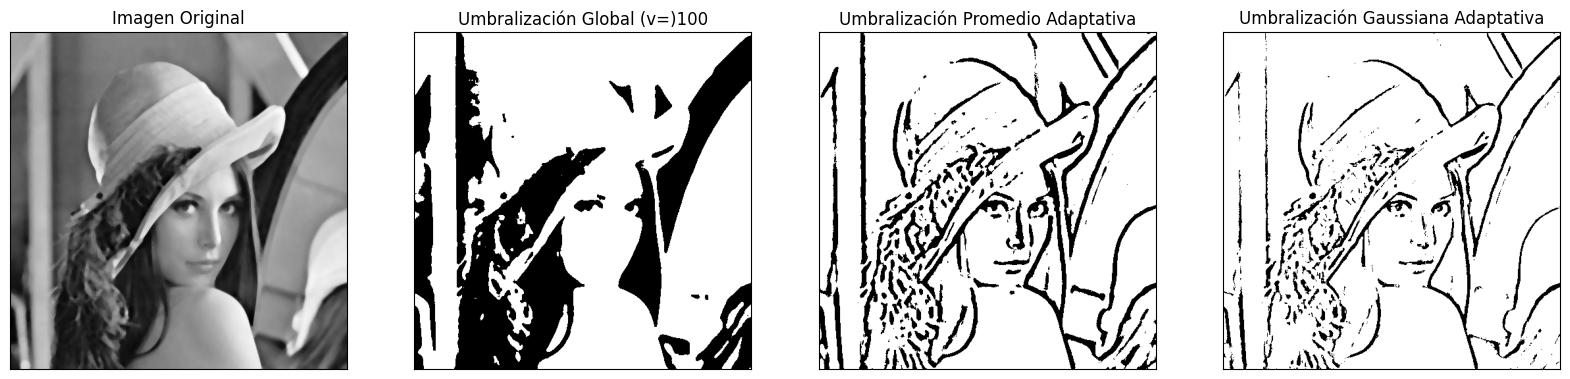

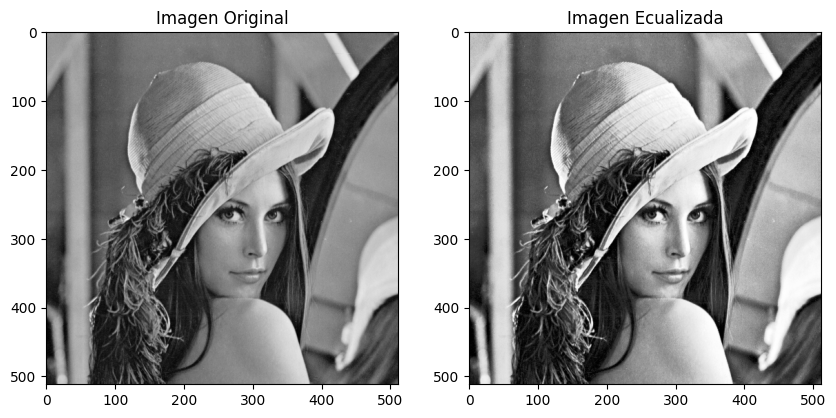

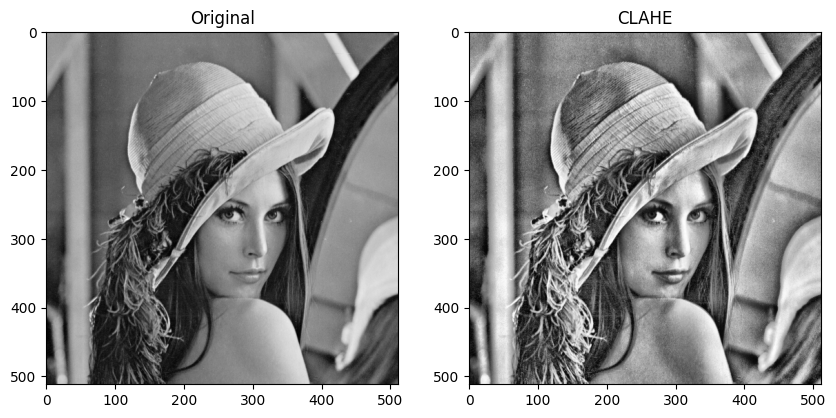

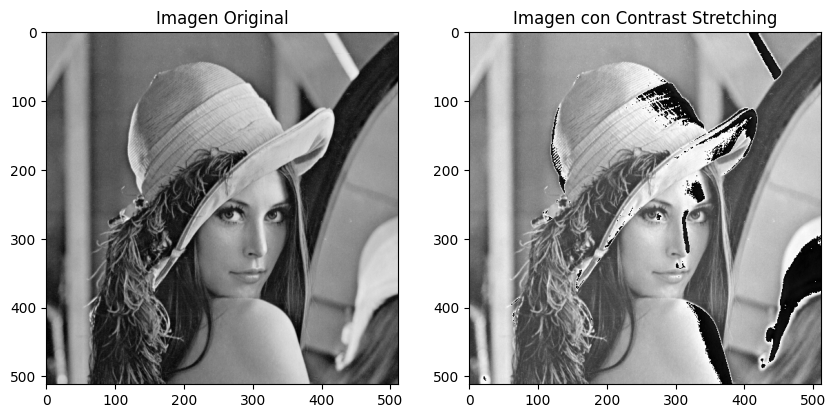

In [76]:
h, w = image.shape[:2]

# Trasladar la imagen cambiando los valores
transition_matrix = np.float32([[1, 0, 150], [0, 1, 80]])  # Cambio de 122 a 150 y de 105 a 80
img_translation = cv.warpAffine(image, transition_matrix, (w, h))

plt.imshow(img_translation)
plt.title("Imagen Trasladada")
plt.show()

# Rotar la imagen con ángulo y escala modificados
rotation_matrix = cv.getRotationMatrix2D(center=(w/2, h/2), angle=-75, scale=0.7)  # Cambio de -100 a -75 y escala de 0.5 a 0.7
rotated_image = cv.warpAffine(src=image, M=rotation_matrix, dsize=(w, h))

plt.imshow(rotated_image)
plt.title("Imagen Rotada y Escalada")
plt.show()

# Escalando con nuevos factores
image_scaled = cv.resize(image, None, fx=0.5, fy=0.5)  # Cambio de 0.3 a 0.5
image_scaled_2 = cv.resize(image, None, fx=3, fy=3, interpolation=cv.INTER_CUBIC)  # Cambio de 4 a 3
image_scaled_3 = cv.resize(image, (400, 600), interpolation=cv.INTER_AREA)  # Cambio de (300, 500) a (400, 600)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(image_scaled), ax[0].set_title("Escalado con Interpolación lineal")
ax[1].imshow(image_scaled_2), ax[1].set_title("Escalado con Interpolación Cúbica")
ax[2].imshow(image_scaled_3), ax[2].set_title("Escalado arbitrario")
plt.show()

# Negativo con nuevo valor
image_neg = 380 - image  # Cambio de 410 a 380

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(image_neg)
plt.title("Imagen Negativa")
plt.show()

# Convertir la imagen a escala de grises
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# Aplicar umbralización con nuevos valores
img = gray_img
img = cv.medianBlur(img, 7)  # Cambio de 5 a 7
v = 100  # Cambio de 85 a 100
ret, th1 = cv.threshold(img, v, 50, cv.THRESH_BINARY)  # Cambio de 40 a 50
th2 = cv.adaptiveThreshold(img, 130, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, 6)  # Cambio de 120 a 130, 11 a 15 y 4 a 6
th3 = cv.adaptiveThreshold(img, 240, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 6)  # Cambio de 250 a 240, 11 a 15 y 4 a 6

titles = ['Imagen Original', 'Umbralización Global (v=)' + str(v), 'Umbralización Promedio Adaptativa', 'Umbralización Gaussiana Adaptativa']
images = [img, th1, th2, th3]

plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Para esconder los "ticks"
plt.show()

# Ecualización de histograma
equ = cv.equalizeHist(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.show()

# CLAHE con nuevos valores
clahe = cv.createCLAHE(clipLimit=3.5, tileGridSize=(10, 10))  # Cambio de 4.0 a 3.5 y (12,8) a (10,10)
clahe_img = clahe.apply(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE")
plt.show()

# Contrast Stretching con nuevos valores
Imin = np.amin(gray_img)
Imax = np.amax(gray_img)
stretched_img = ((gray_img - Imax) * (30 / (Imin))).astype(np.uint8)  # Cambio de 20 a 30

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title("Imagen con Contrast Stretching")
plt.show()


## 🎭 **8. CDF y Ecualización con Histogramas** <a name="tema8"></a>
📌 **Objetivo:** Visualizar cómo cambia la distribución de la intensidad antes y después de la ecualización del histograma.

In [77]:
%%capture
image_url = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/Einstein_1_lowcontrast.tif"
file_path = "Einstein_1_lowcontrast.tif"
!wget -O {file_path} {image_url}

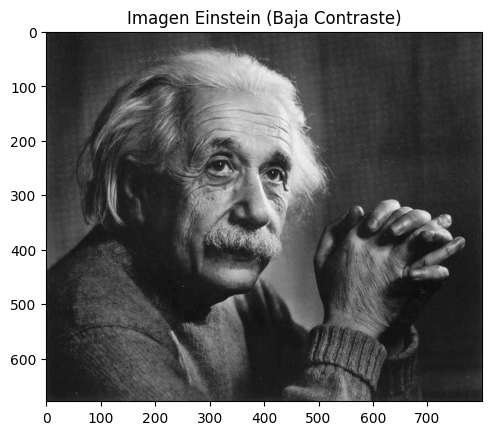

In [78]:
# 📥 **Carga de Imagen Einstein**
image_path = "Einstein_1_lowcontrast.tif"
image_einstein = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Mostrar la imagen cargada
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Einstein (Baja Contraste)")
plt.show()

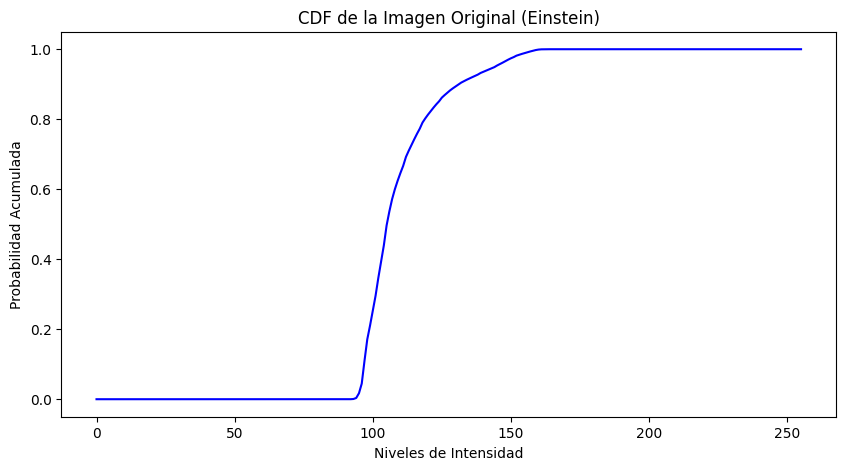

In [79]:
# Calcular el histograma y la función de distribución acumulativa (CDF)
hist, bins = np.histogram(image_einstein.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_norm_orig = cdf / cdf.max()

plt.figure(figsize=(10,5))
plt.plot(cdf_norm_orig, color='b')
plt.xlabel('Niveles de Intensidad')
plt.ylabel('Probabilidad Acumulada')
plt.title('CDF de la Imagen Original (Einstein)')
plt.show()

### 📌 **Ecualización de Histograma con Visualización**

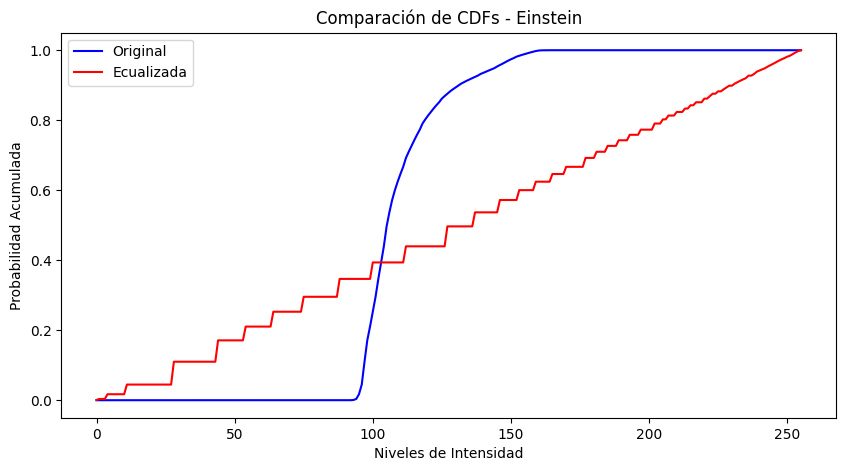

In [80]:
# Aplicar ecualización de histograma
equ = cv.equalizeHist(image_einstein)
hist_equ, bins_equ = np.histogram(equ.flatten(), 256, [0,256])
cdf_equ = hist_equ.cumsum()
cdf_norm_equ = cdf_equ / cdf_equ.max()

plt.figure(figsize=(10,5))
plt.plot(cdf_norm_orig, color='b', label='Original')
plt.plot(cdf_norm_equ, color='r', label='Ecualizada')
plt.xlabel('Niveles de Intensidad')
plt.ylabel('Probabilidad Acumulada')
plt.title('Comparación de CDFs - Einstein')
plt.legend()
plt.show()

### 📌 **Comparación Visual Antes y Después de la Ecualización**

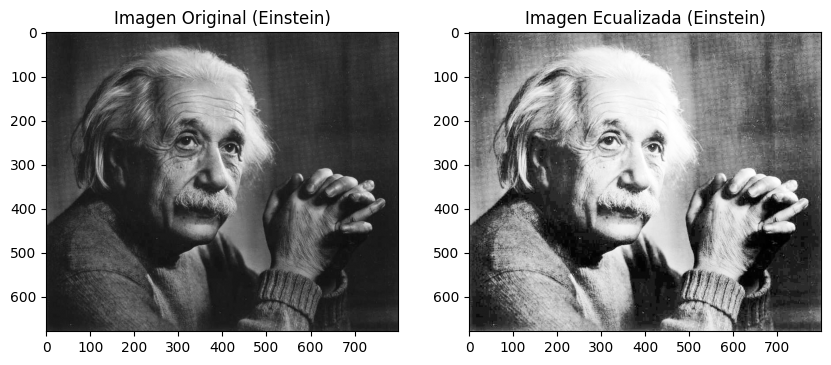

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada (Einstein)")
plt.show()

<ipython-input-82-211ea2d00e07>:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
<ipython-input-82-211ea2d00e07>:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(), 256, [0,256], color='r')


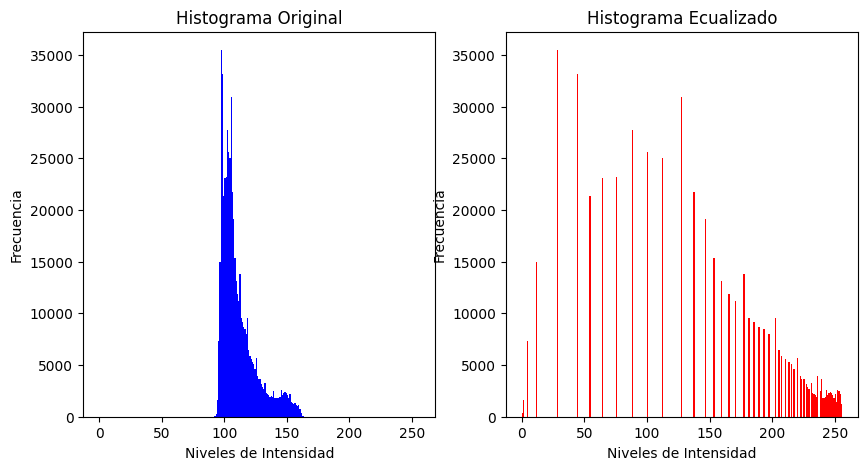

In [82]:
# Plotear los histogramas
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
plt.title("Histograma Original")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(1, 2, 2)
plt.hist(equ.ravel(), 256, [0,256], color='r')
plt.title("Histograma Ecualizado")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.show()

### ⚡ **9. CLAHE (Contrast Limited Adaptive Histogram Equalization)** <a name="tema5"></a>

📌 **Objetivo:** Aplicar ecualización adaptativa para mejorar el contraste sin amplificar demasiado el ruido.

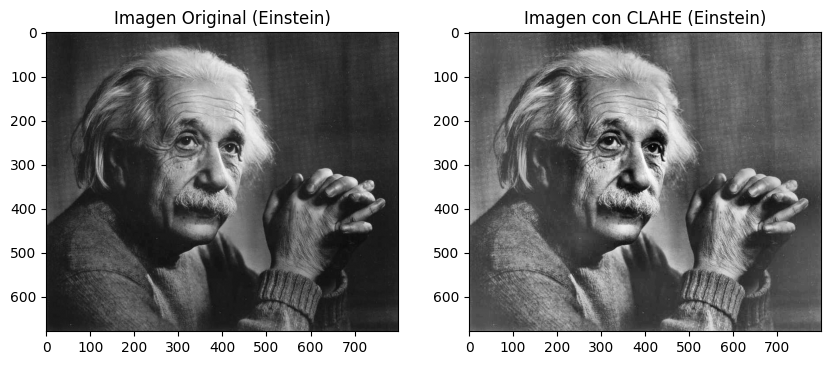

In [83]:
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image_einstein)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Imagen con CLAHE (Einstein)")
plt.show()

### 🔍 **10. Ampliación del Histograma (Contrast Stretching)** <a name="tema6"></a>
📌 **Objetivo:** Expandir el rango dinámico de la imagen para mejorar el contraste.

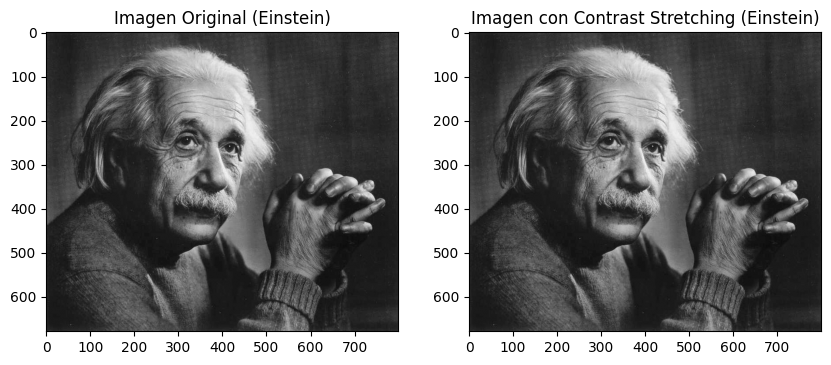

In [84]:
Imin = np.amin(image_einstein)
Imax = np.amax(image_einstein)
stretched_img = ((image_einstein - Imin) * (255 / (Imax - Imin))).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title("Imagen con Contrast Stretching (Einstein)")
plt.show()

<ipython-input-85-f0ccc3cd6c83>:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
<ipython-input-85-f0ccc3cd6c83>:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(), 256, [0,256], color='r')
<ipython-input-85-f0ccc3cd6c83>:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_img.ravel(), 256, [0,256], color='g')


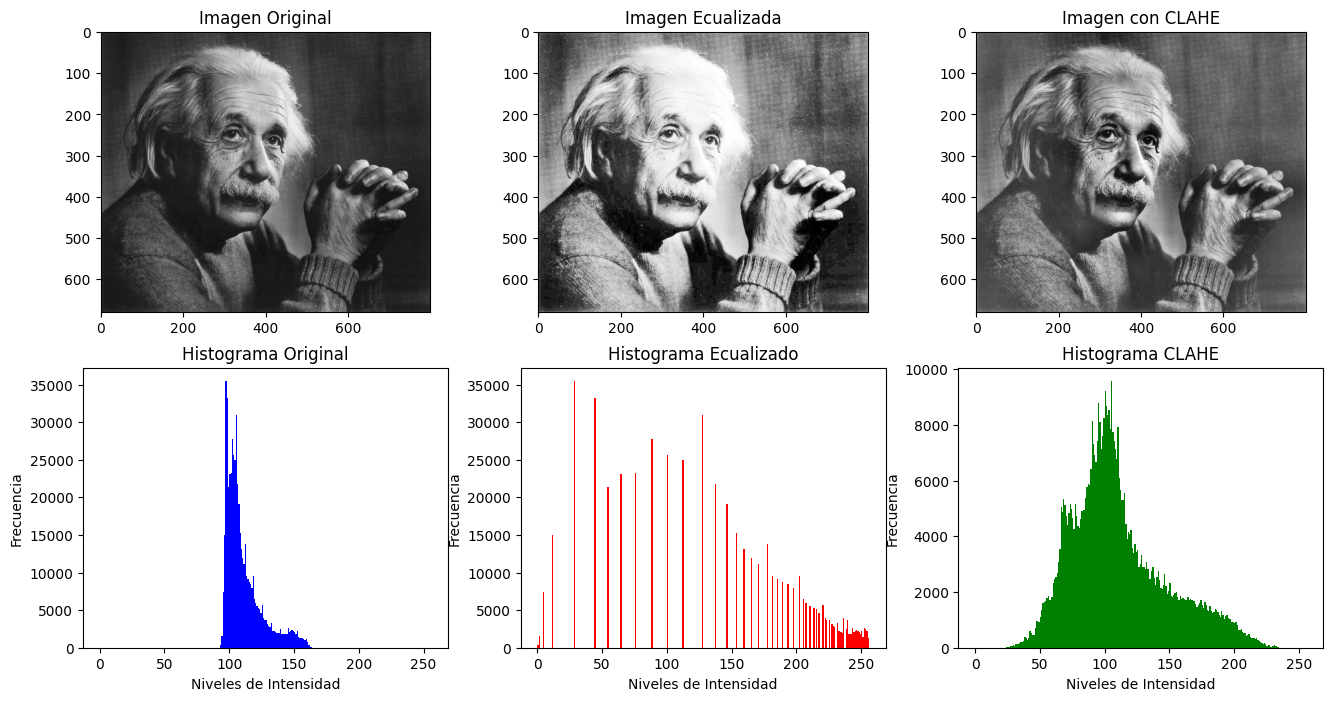

In [85]:
# @title resultados
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original")
plt.subplot(2, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("Imagen con CLAHE")
plt.subplot(2, 3, 4)
plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
plt.title("Histograma Original")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(2, 3, 5)
plt.hist(equ.ravel(), 256, [0,256], color='r')
plt.title("Histograma Ecualizado")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(2, 3, 6)
plt.hist(clahe_img.ravel(), 256, [0,256], color='g')
plt.title("Histograma CLAHE")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.show()

### 🔬 **11. Preguntas y Reflexión** <a name="tema7"></a>

**Preguntas:**
- ¿Cuál es la diferencia entre "estiramiento de contraste" y "ecualización de histograma"?

El estiramiento de contraste mejora imágenes con un rango de intensidades limitado, ampliando dicho rango para mejorar la visibilidad de los detalles. En cambio, la ecualización de histograma es más útil cuando la imagen presenta una distribución desigual de intensidades, como aquellas con muchas áreas extremadamente claras u oscuras. Este método redistribuye los niveles de intensidad para mejorar el detalle, aunque, dependiendo de la configuración, podría introducir ruido.

- ¿Cuándo preferirías usar CLAHE sobre la ecualización estándar?

CLAHE (Contrast Limited Adaptive Histogram Equalization) es una variante avanzada de la ecualización de histograma que evita la amplificación excesiva del ruido en regiones homogéneas. Se recomienda su uso en imágenes con alto contraste en distintas zonas, como en radiografías, tomografías y aplicaciones de visión nocturna, donde un realce excesivo del contraste podría generar efectos no deseados.
- ¿Qué ventajas y desventajas tiene el contraste adaptativo?

Ventajas:

Permite resaltar detalles en regiones específicas sin modificar significativamente el resto de la imagen.
Conserva mejor los detalles en comparación con la ecualización de histograma estándar.

Desventajas:

Si el área de ajuste no se define correctamente, puede alterar la imagen de manera no deseada.
Un mal ajuste de los parámetros podría generar ruido en la imagen.


